# Importing Libraries

In [2]:
import pandas as pd

from sklearn import tree
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt

# Preprocessing The Data

In [3]:
train_data = pd.read_csv("Census_income_train.csv")

In [4]:
train_data.head()

,Age,Workclass,fnlwgt,Education,Education-num,Marital status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
train_data.isnull().sum()

Age               0
Workclass         0
fnlwgt            0
Education         0
Education-num     0
Marital status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital-gain      0
Capital-loss      0
Hours-per-week    0
Native-country    0
Income            0
dtype: int64

## Removing data containing "?"

In [6]:
train_data["Workclass"].str.contains("\?")

0        False
1        False
2        False
3        False
4        False
         ...  
32555    False
32556    False
32557    False
32558    False
32559    False
Name: Workclass, Length: 32560, dtype: bool

In [7]:
train_data["Workclass"].str.contains("\?") == False

0        True
1        True
2        True
3        True
4        True
         ... 
32555    True
32556    True
32557    True
32558    True
32559    True
Name: Workclass, Length: 32560, dtype: bool

In [8]:
clean_train_data = train_data[train_data["Workclass"].str.contains("\?") == False]

In [9]:
len(clean_train_data)

30724

In [10]:
clean_train_data = clean_train_data[clean_train_data["Occupation"].str.contains("\?") == False]

In [11]:
len(clean_train_data)

30717

In [12]:
clean_train_data = clean_train_data[clean_train_data["Native-country"].str.contains("\?") == False]

In [13]:
len(clean_train_data)

30161

In [14]:
clean_train_data = clean_train_data.reset_index(drop=True)

## Creating Dummy Values

In [15]:
train_dummies = pd.get_dummies(clean_train_data, drop_first=False)

In [16]:
train_dummies.head()

,Age,fnlwgt,Education-num,Capital-gain,Capital-loss,Hours-per-week,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Private,Workclass_ Self-emp-inc,...,Native-country_ Scotland,Native-country_ South,Native-country_ Taiwan,Native-country_ Thailand,Native-country_ Trinadad&Tobago,Native-country_ United-States,Native-country_ Vietnam,Native-country_ Yugoslavia,Income_ <=50K,Income_ >50K
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,38,215646,9,0,0,40,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
3,53,234721,7,0,0,40,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
4,28,338409,13,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [17]:
train_dummies = train_dummies.drop(['Income_ <=50K'],axis=1)

In [18]:
# The input features are everything besides the last column
train_input = train_dummies.iloc[:,:-1]

# The target/output is just the last column
train_target = train_dummies.iloc[:,-1]

## importing the test dataset

In [19]:
test_data = pd.read_csv("Census_income_test.csv")

In [20]:
clean_test_data = test_data[test_data["Workclass"].str.contains("\?") == False]

In [21]:
clean_test_data = clean_test_data[clean_test_data["Occupation"].str.contains("\?") == False]

In [22]:
clean_test_data = clean_test_data[clean_test_data["Native-country"].str.contains("\?") == False]

In [23]:
clean_test_data = clean_test_data.reset_index(drop=True)

# Creating the dummy values for test

In [24]:
test_dummies = pd.get_dummies(clean_test_data, drop_first=False)

In [25]:
test_dummies = test_dummies.drop(['Income_ <=50K.'],axis=1)

In [26]:
test_input = test_dummies.iloc[:,:-1]
test_target = test_dummies.iloc[:,-1]

# Creating the Tree Model 

In [27]:
clf = tree.DecisionTreeClassifier()

In [28]:
clf.fit(train_input,train_target)

DecisionTreeClassifier()

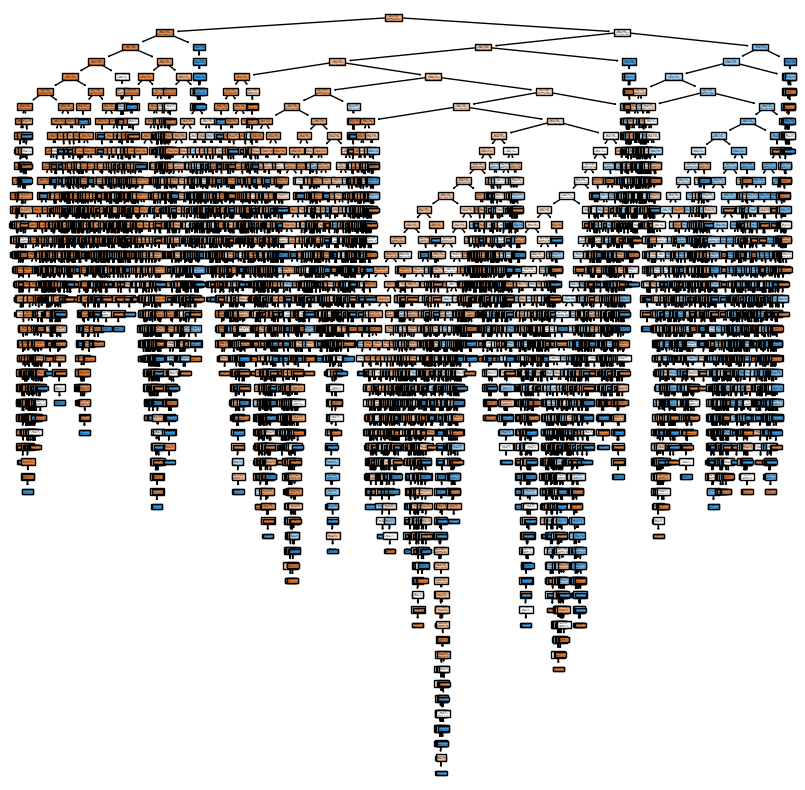

In [29]:
plt.figure(figsize=(10,10))
tree.plot_tree(clf, filled=True)
plt.show()


# Testing The model

In [30]:
test_pred=clf.predict(test_input)

In [31]:
print(classification_report(test_target, test_pred))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87     11360
           1       0.60      0.62      0.61      3700

    accuracy                           0.80     15060
   macro avg       0.74      0.74      0.74     15060
weighted avg       0.81      0.80      0.80     15060



# Create The Tree with Pruning

In [32]:
clf = tree.DecisionTreeClassifier(ccp_alpha=0.001)

In [33]:
clf.fit(train_input,train_target)

DecisionTreeClassifier(ccp_alpha=0.001)

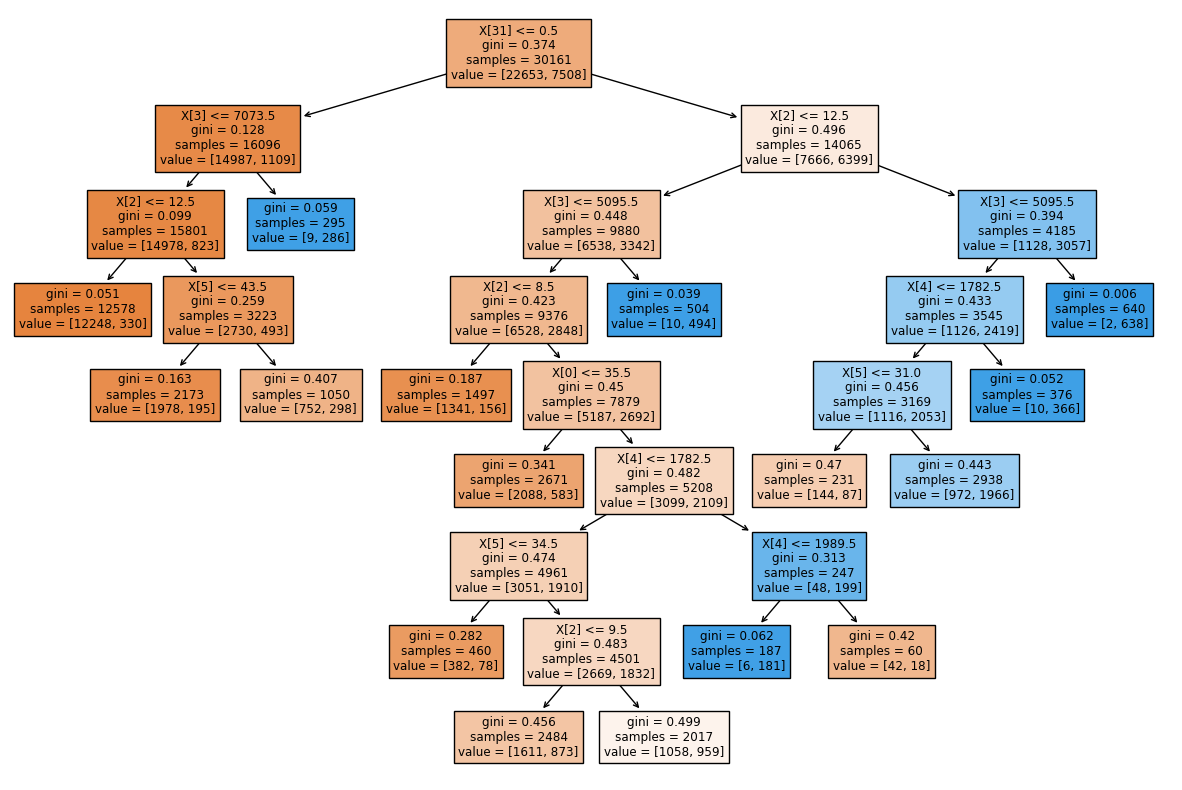

In [34]:
plt.figure(figsize=(15,10))
tree.plot_tree(clf, filled=True)
plt.show()

In [35]:
test_pred = clf.predict(test_input)

In [36]:
print(classification_report(test_target, test_pred))

              precision    recall  f1-score   support

           0       0.86      0.96      0.90     11360
           1       0.79      0.51      0.62      3700

    accuracy                           0.85     15060
   macro avg       0.82      0.73      0.76     15060
weighted avg       0.84      0.85      0.83     15060



# Testing RandomForest

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
clf.fit(train_input,train_target)

DecisionTreeClassifier(ccp_alpha=0.001)

In [40]:
test_pred = clf.predict(test_input)

In [41]:
print(classification_report(test_target, test_pred))

              precision    recall  f1-score   support

           0       0.86      0.96      0.90     11360
           1       0.79      0.51      0.62      3700

    accuracy                           0.85     15060
   macro avg       0.82      0.73      0.76     15060
weighted avg       0.84      0.85      0.83     15060



## Testing with different n_estimators

In [46]:
clf = RandomForestClassifier(ccp_alpha=0.0001,n_estimators = 150)

In [47]:
clf.fit(train_input,train_target)

RandomForestClassifier(ccp_alpha=0.0001, n_estimators=150)

In [48]:
test_pred = clf.predict(test_input)

In [49]:
print(classification_report(test_target, test_pred))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91     11360
           1       0.77      0.62      0.69      3700

    accuracy                           0.86     15060
   macro avg       0.83      0.78      0.80     15060
weighted avg       0.86      0.86      0.86     15060

